Start by explaining the data cleaning performed here ...

# Task 1

Start by loading the data associated with the Grand Prix that you have been allocated.

In [1]:
import pandas
event_name = 'Dutch2022-clean'
laps = pandas.read_csv(event_name + '.csv')
laps

,Time,Driver,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Compound,TyreLife,TrackStatus
0,0 days 01:03:16.592000,VER,0 days 00:01:19.660000,1,1,0 days 00:23:48.433000,NaN,SOFT,1,1
1,0 days 01:04:32.841000,VER,0 days 00:01:16.249000,2,1,NaN,NaN,SOFT,2,2
2,0 days 01:05:49.364000,VER,0 days 00:01:16.523000,3,1,NaN,NaN,SOFT,3,1
3,0 days 01:07:06.020000,VER,0 days 00:01:16.656000,4,1,NaN,NaN,SOFT,4,2
4,0 days 01:08:22.469000,VER,0 days 00:01:16.449000,5,1,NaN,NaN,SOFT,5,1
...,...,...,...,...,...,...,...,...,...,...
1383,0 days 02:07:25.585000,BOT,0 days 00:01:21.315000,49,3,NaN,NaN,MEDIUM,15,7
1384,0 days 02:08:43.815000,BOT,0 days 00:01:18.230000,50,3,NaN,NaN,MEDIUM,16,1
1385,0 days 02:10:00.659000,BOT,0 days 00:01:16.844000,51,3,NaN,NaN,MEDIUM,17,1
1386,0 days 02:11:17.909000,BOT,0 days 00:01:17.250000,52,3,NaN,NaN,MEDIUM,18,1


# Task 2

The LapTime column is a string representing a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html">Timedelta</a>.

Convert it using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.to_timedelta.html">pandas.to_time_delta</a> function to compute total number of seconds for each lap.

In [2]:
laps['LapSeconds'] = pandas.to_timedelta(laps.LapTime).dt.total_seconds()
laps

,Time,Driver,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Compound,TyreLife,TrackStatus,LapSeconds
0,0 days 01:03:16.592000,VER,0 days 00:01:19.660000,1,1,0 days 00:23:48.433000,NaN,SOFT,1,1,79.660
1,0 days 01:04:32.841000,VER,0 days 00:01:16.249000,2,1,NaN,NaN,SOFT,2,2,76.249
2,0 days 01:05:49.364000,VER,0 days 00:01:16.523000,3,1,NaN,NaN,SOFT,3,1,76.523
3,0 days 01:07:06.020000,VER,0 days 00:01:16.656000,4,1,NaN,NaN,SOFT,4,2,76.656
4,0 days 01:08:22.469000,VER,0 days 00:01:16.449000,5,1,NaN,NaN,SOFT,5,1,76.449
...,...,...,...,...,...,...,...,...,...,...,...
1383,0 days 02:07:25.585000,BOT,0 days 00:01:21.315000,49,3,NaN,NaN,MEDIUM,15,7,81.315
1384,0 days 02:08:43.815000,BOT,0 days 00:01:18.230000,50,3,NaN,NaN,MEDIUM,16,1,78.230
1385,0 days 02:10:00.659000,BOT,0 days 00:01:16.844000,51,3,NaN,NaN,MEDIUM,17,1,76.844
1386,0 days 02:11:17.909000,BOT,0 days 00:01:17.250000,52,3,NaN,NaN,MEDIUM,18,1,77.250


# Task 3

For many of the following task we want to consider only *"normal"* laps.

To be considered normal all of the following conditions must hold:
1. The track status must be green for the entire lap (i.e. no red or orange flags which will slow down the drivers).
1. Exclude in-laps and out-laps, i.e. laps in which the driver goes into the pits at the end of the lap or leaves the pits at the start of the lap
1. The lap must be conducted on dry tyres (i.e. Soft, Medium or Hard, not Wet or Intermediate)

In [4]:

normal = (laps.TrackStatus==1) & laps.PitInTime.isnull() & laps.PitOutTime.isnull() & laps.Compound.isin(['SOFT', 'MEDIUM', 'HARD']) 
normal_laps = laps[normal]
normal_laps

,Time,Driver,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Compound,TyreLife,TrackStatus,LapSeconds
2,0 days 01:05:49.364000,VER,0 days 00:01:16.523000,3,1,NaN,NaN,SOFT,3,1,76.523
4,0 days 01:08:22.469000,VER,0 days 00:01:16.449000,5,1,NaN,NaN,SOFT,5,1,76.449
5,0 days 01:09:38.819000,VER,0 days 00:01:16.350000,6,1,NaN,NaN,SOFT,6,1,76.350
6,0 days 01:10:55.072000,VER,0 days 00:01:16.253000,7,1,NaN,NaN,SOFT,7,1,76.253
7,0 days 01:12:11.558000,VER,0 days 00:01:16.486000,8,1,NaN,NaN,SOFT,8,1,76.486
...,...,...,...,...,...,...,...,...,...,...,...
1379,0 days 02:01:16.741000,BOT,0 days 00:01:17.131000,45,3,NaN,NaN,MEDIUM,11,1,77.131
1384,0 days 02:08:43.815000,BOT,0 days 00:01:18.230000,50,3,NaN,NaN,MEDIUM,16,1,78.230
1385,0 days 02:10:00.659000,BOT,0 days 00:01:16.844000,51,3,NaN,NaN,MEDIUM,17,1,76.844
1386,0 days 02:11:17.909000,BOT,0 days 00:01:17.250000,52,3,NaN,NaN,MEDIUM,18,1,77.250


# Task 4

Show the normal lap times for your favourite driver

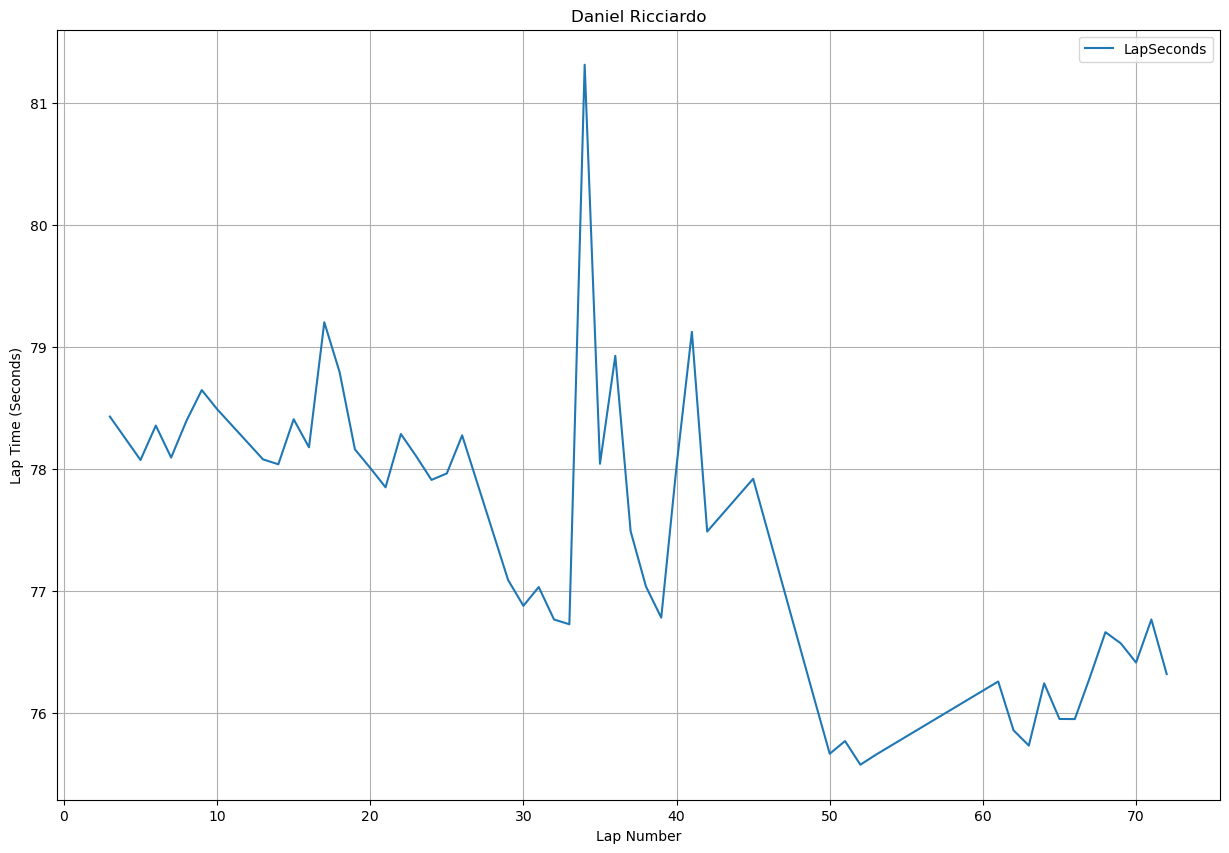

In [5]:
ax = normal_laps[normal_laps.Driver == 'RIC'].plot(x = 'LapNumber', y = 'LapSeconds', title='Daniel Ricciardo', figsize=(15,10), grid=True)
ax.set_xlabel('Lap Number')
x = ax.set_ylabel('Lap Time (Seconds)')

# Task 5

Show the number of total laps raced on each tyre compound (including all drivers)

Compound
HARD      331
MEDIUM    512
SOFT      545
dtype: int64

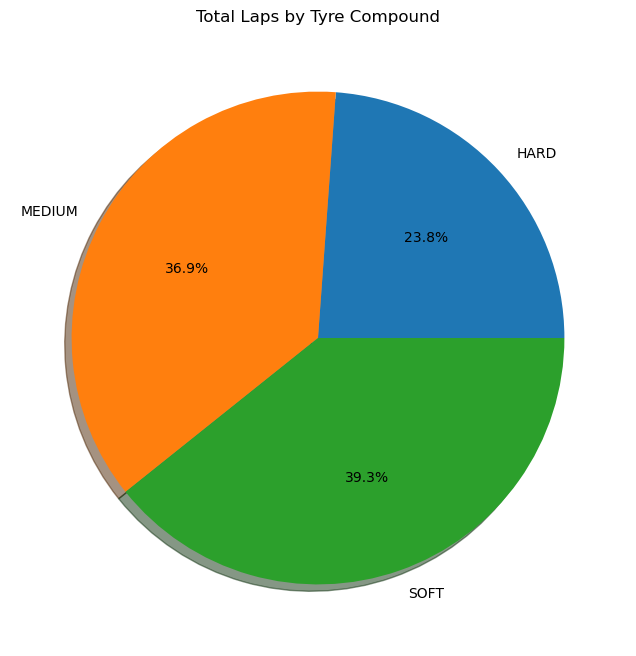

In [6]:
compounds = laps.groupby('Compound').size()
compounds.plot.pie(autopct='%1.1f%%', title="Total Laps by Tyre Compound", figsize=(8,8), shadow=True)
compounds

# Task 6

Show the fastest lap time for each driver (sorted from fastest to slowest)

Driver
VER    73.652
RUS    73.671
HAM    73.854
ALO    74.144
PER    74.404
LEC    74.413
SAI    74.643
NOR    74.706
VET    74.862
STR    75.043
OCO    75.084
GAS    75.165
MSC    75.233
MAG    75.369
ALB    75.534
RIC    75.577
ZHO    75.940
LAT    76.066
BOT    76.844
TSU    77.138
Name: LapSeconds, dtype: float64

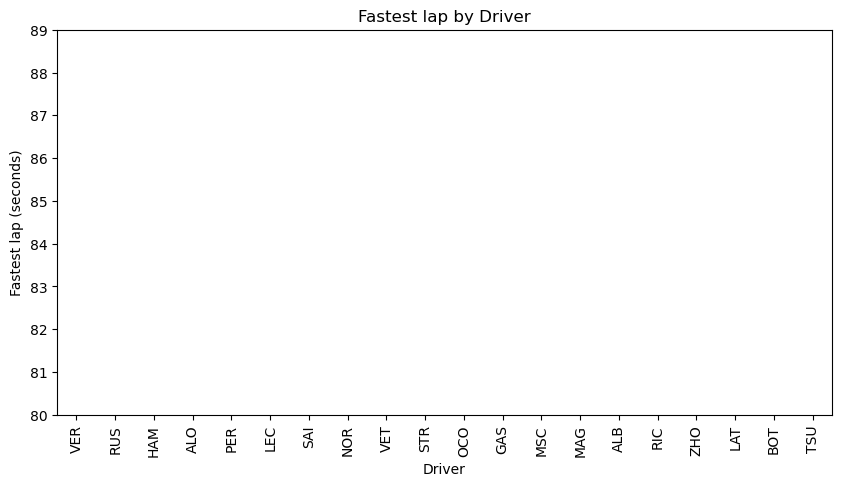

In [7]:
fastest = laps.groupby('Driver').LapSeconds.min().sort_values()
fastest.plot.bar(ylabel='Fastest lap (seconds)', title = 'Fastest lap by Driver', ylim=(80,89), figsize=(10,5))
fastest

# Task 7

Show the lap times for each driver as a box plot (excluding 'fliers')

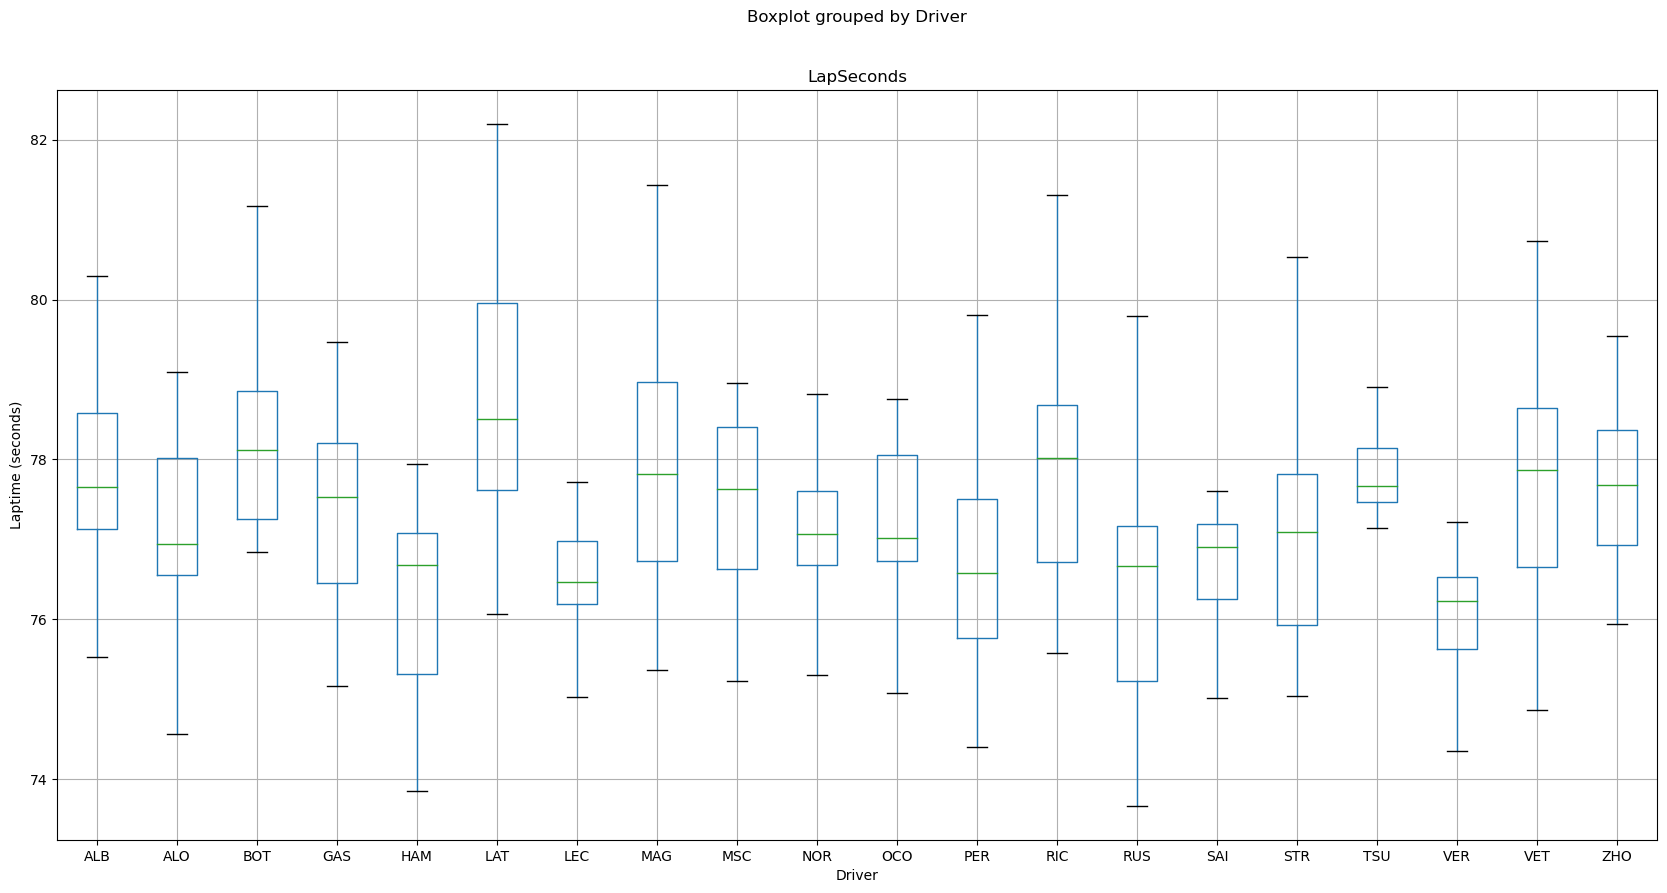

In [8]:
ax = laps.boxplot('LapSeconds', by='Driver', showfliers = False, figsize=(20,10), ylabel='Laptime (seconds)') 

# Task 8

Show the tyre compound used in each stint for each driver.

Hint: use groupby and <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html">unstack</a> to format with one column for each stint.

In [9]:
laps.groupby(['Driver','Stint']).Compound.min().unstack().fillna('') 

Stint,1,2,3,4,5,6
Driver,,,,,,
ALB,MEDIUM,MEDIUM,HARD,SOFT,SOFT,
ALO,SOFT,HARD,SOFT,SOFT,,
BOT,SOFT,SOFT,MEDIUM,,,
GAS,SOFT,MEDIUM,HARD,SOFT,SOFT,
HAM,MEDIUM,HARD,MEDIUM,MEDIUM,,
LAT,SOFT,MEDIUM,HARD,,SOFT,
LEC,SOFT,MEDIUM,HARD,SOFT,SOFT,
MAG,MEDIUM,MEDIUM,HARD,SOFT,SOFT,
MSC,MEDIUM,MEDIUM,HARD,SOFT,SOFT,


# Task 9

Show the number of laps in each stint for each driver

In [10]:
laps.groupby(['Driver','Stint']).size().unstack().fillna('')

Stint,1,2,3,4,5,6
Driver,,,,,,
ALB,21.0,21.0,13.0,1.0,16.0,
ALO,12.0,35.0,10.0,15.0,,
BOT,16.0,18.0,19.0,,,
GAS,11.0,21.0,24.0,1.0,15.0,
HAM,29.0,19.0,9.0,15.0,,
LAT,13.0,13.0,28.0,,16.0,
LEC,17.0,28.0,11.0,1.0,15.0,
MAG,14.0,20.0,13.0,9.0,16.0,
MSC,13.0,20.0,14.0,9.0,16.0,


# Task 10

Show the number of laps ***and*** tyre compound in each stint for each driver.

Hint: *apply* a function that returns a tuple (number of laps and tyre compound) for a group of rows.

In [11]:
def summary(group):
    return (len(group), group.Compound.min())


laps.groupby(['Driver','Stint']).apply(summary).unstack().fillna('')                                                      

Stint,1,2,3,4,5,6
Driver,,,,,,
ALB,"(21, MEDIUM)","(21, MEDIUM)","(13, HARD)","(1, SOFT)","(16, SOFT)",
ALO,"(12, SOFT)","(35, HARD)","(10, SOFT)","(15, SOFT)",,
BOT,"(16, SOFT)","(18, SOFT)","(19, MEDIUM)",,,
GAS,"(11, SOFT)","(21, MEDIUM)","(24, HARD)","(1, SOFT)","(15, SOFT)",
HAM,"(29, MEDIUM)","(19, HARD)","(9, MEDIUM)","(15, MEDIUM)",,
LAT,"(13, SOFT)","(13, MEDIUM)","(28, HARD)",,"(16, SOFT)",
LEC,"(17, SOFT)","(28, MEDIUM)","(11, HARD)","(1, SOFT)","(15, SOFT)",
MAG,"(14, MEDIUM)","(20, MEDIUM)","(13, HARD)","(9, SOFT)","(16, SOFT)",
MSC,"(13, MEDIUM)","(20, MEDIUM)","(14, HARD)","(9, SOFT)","(16, SOFT)",


# Task 11

Next we want to *normalize* lap times based on fuel load.

We start by visualizing how the median lap time for normal laps across all drivers tends to decrease with lap number.

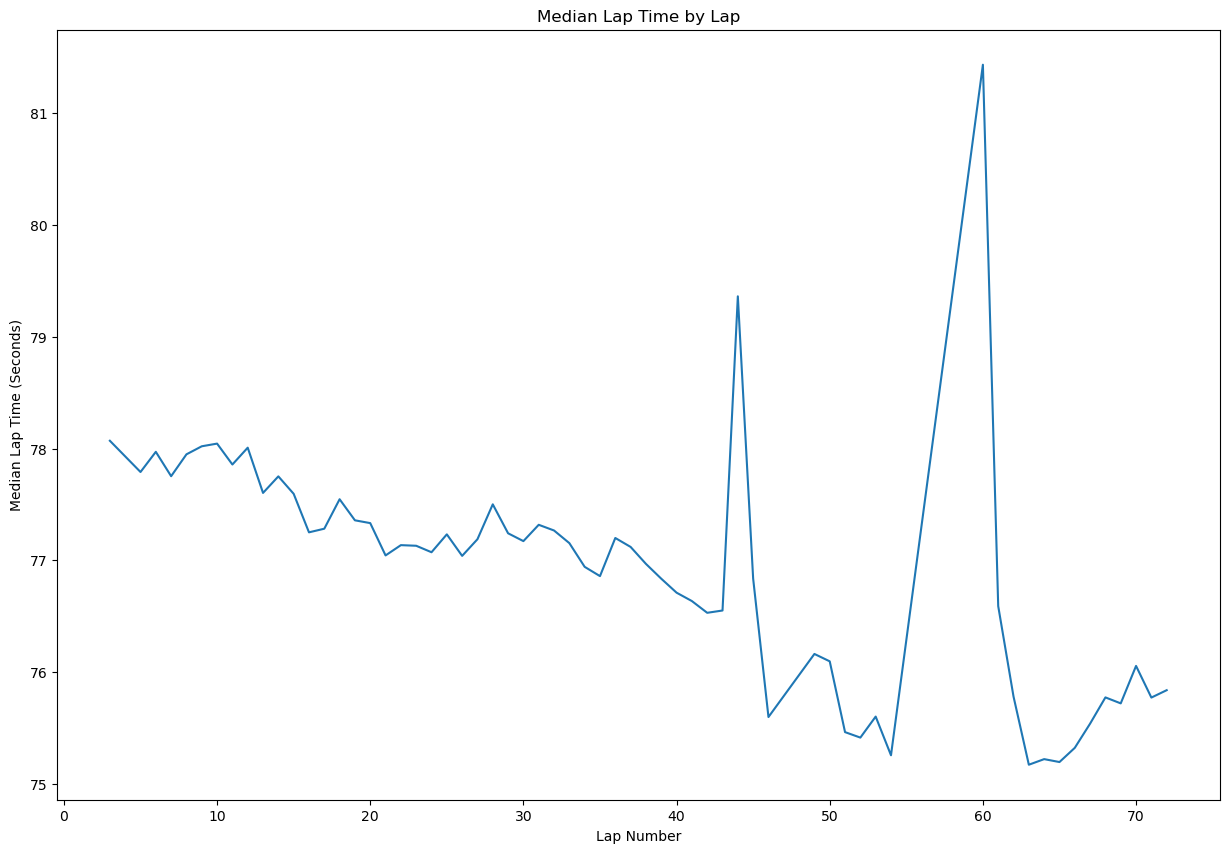

In [12]:
time_by_lap = pandas.DataFrame(normal_laps.groupby(['LapNumber']).LapSeconds.median())
ax = time_by_lap.plot(title='Median Lap Time by Lap', figsize=(15,10), legend=False)
ax.set_xlabel('Lap Number')
x = ax.set_ylabel('Median Lap Time (Seconds)')

# Task 12

Next we try to find the ***line of best fit*** for this data using the <a href="https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html">polyfit</a> function from the numpy module (using deg=1).

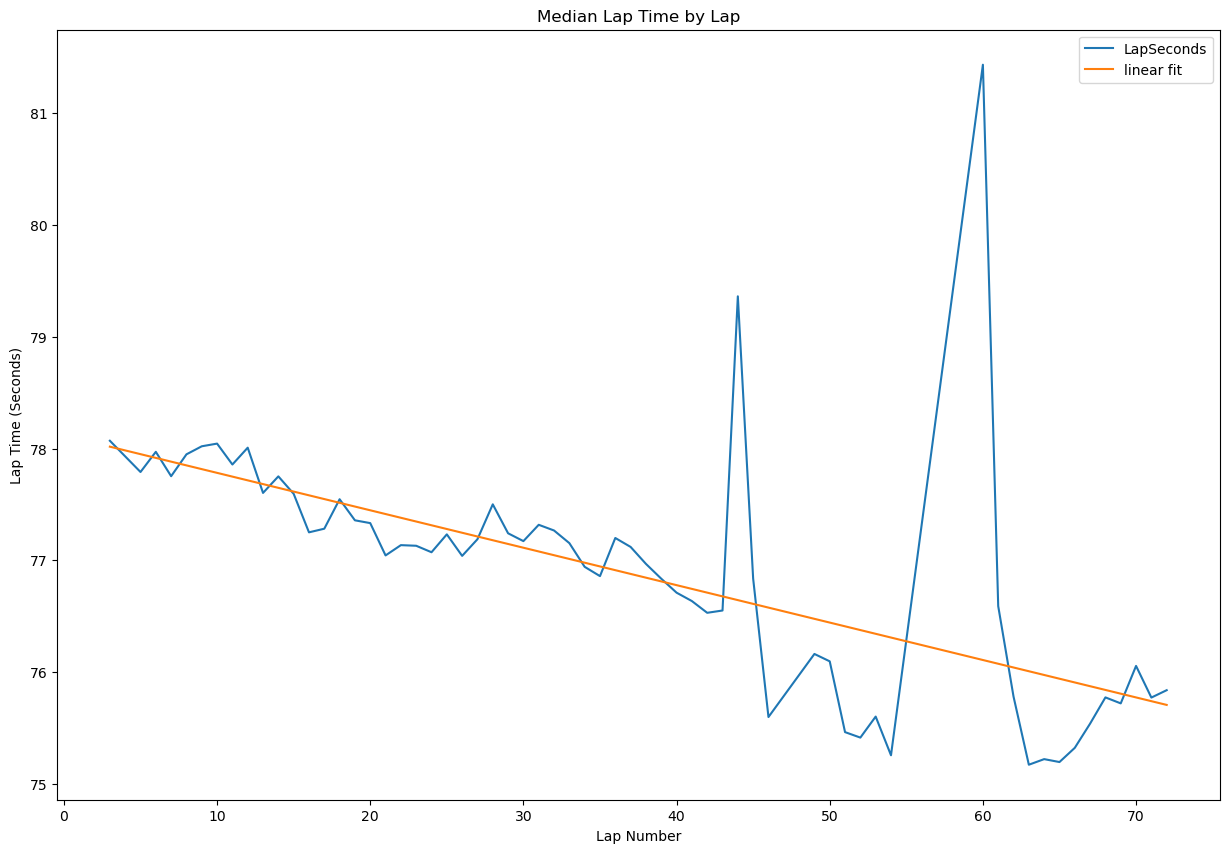

In [13]:
import numpy

[m,c] = numpy.polyfit(x=time_by_lap.index, y=time_by_lap.LapSeconds,deg=1)
p = numpy.poly1d([m,c])
time_by_lap['linear fit'] = p(time_by_lap.index)
ax = time_by_lap.plot(title='Median Lap Time by Lap', figsize=(15,10))
ax.set_xlabel('Lap Number')
x = ax.set_ylabel('Lap Time (Seconds)')

# Task 13

Once we know the slope of this line of best fit (*y = mx + c*) we can compute a new column, the *fuel corrected lap time*, which is the original lap time minus $m$ times the number of laps remaining.

On the last lap, the number of laps remaining will be zero, so the fuel corrected lap time will be the same as the original lap time.

We assume that the fuel tank will be near empty on the last lap of the race. 

The fuel corrected lap time is meant to be an estimate of how fast the lap time would have been if the car had a virtually empty fuel tank (i.e. lightest possible total weight = car + fuel).

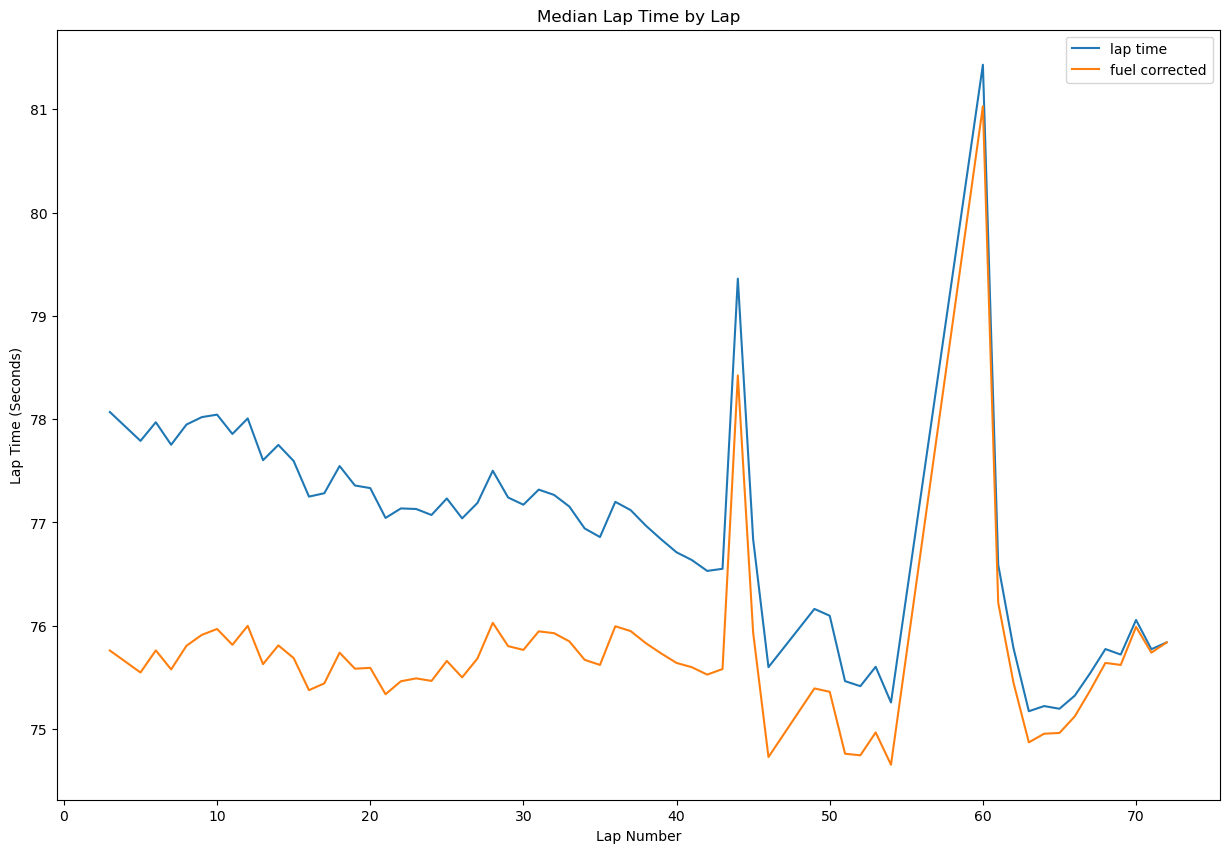

In [14]:
lap_count = laps.LapNumber.max() 
laps['fuel_corrected_laptime'] = laps.LapSeconds + m * (lap_count - laps.LapNumber)
normal_laps = laps[normal]
group = normal_laps.groupby('LapNumber')

ax = group.LapSeconds.median().plot(title='Median Lap Time by Lap', label='lap time', legend=True, figsize=(15,10))
ax = group.fuel_corrected_laptime.median().plot(label='fuel corrected', legend=True)
ax.set_xlabel('Lap Number')
x = ax.set_ylabel('Lap Time (Seconds)')

# Task 14

Next we want to see how fuel corrected normal lap times change during a stint depending on the tyre compound. 

We start by analysing all normal laps completed on Soft Compound tyres and plot how the median fuel corrected lap time varies with the age of the tyre (which is zero at the start of each stint).


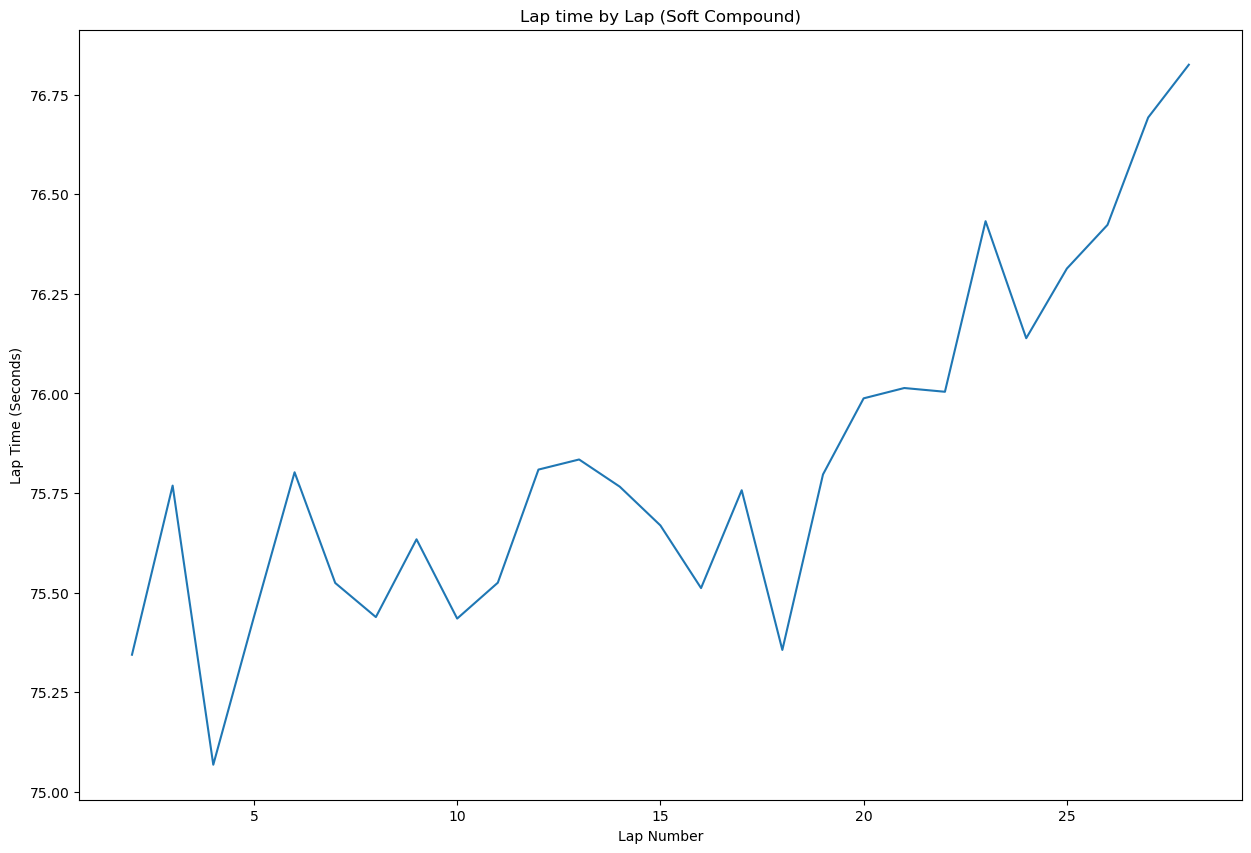

In [15]:
soft_laps = normal_laps[normal_laps.Compound == 'SOFT']
soft_times = soft_laps.groupby('TyreLife').fuel_corrected_laptime.median()

ax = soft_times.plot(label='Raw', legend=False, title='Lap time by Lap (Soft Compound)', figsize=(15,10))
ax.set_xlabel('Lap Number')
x = ax.set_ylabel('Lap Time (Seconds)')

# Task 15

To make it easier to visualize the general shape of the curve we smooth out the noise by computing the average lap times using a rolling window.

(Use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html">pandas.DataFrame.rolling</a> method with window = 8, min_periods = 4, centred = True)

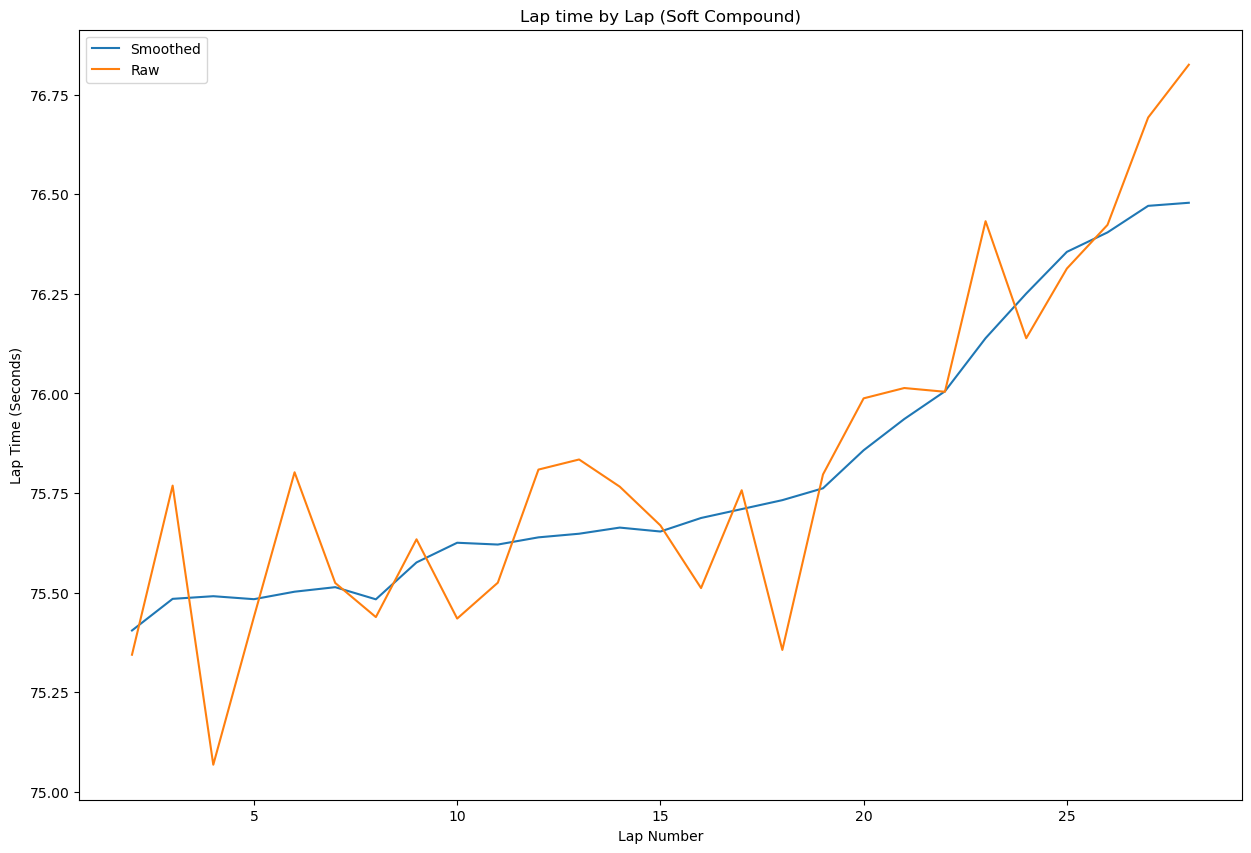

In [18]:
sliding_window = 8

ax = soft_times.rolling(sliding_window, center=True, min_periods=sliding_window//2).mean().plot(label='Smoothed', title='Lap time by Lap (Soft Compound)', figsize=(15,10), legend=True)
ax = soft_times.plot(label='Raw', legend=True)
ax.set_xlabel('Lap Number')
x = ax.set_ylabel('Lap Time (Seconds)')

# Task 16

Now plot the smoothed curves for the Soft, Medium and Hard compound tyres together on the same plot (without repeating yourself).

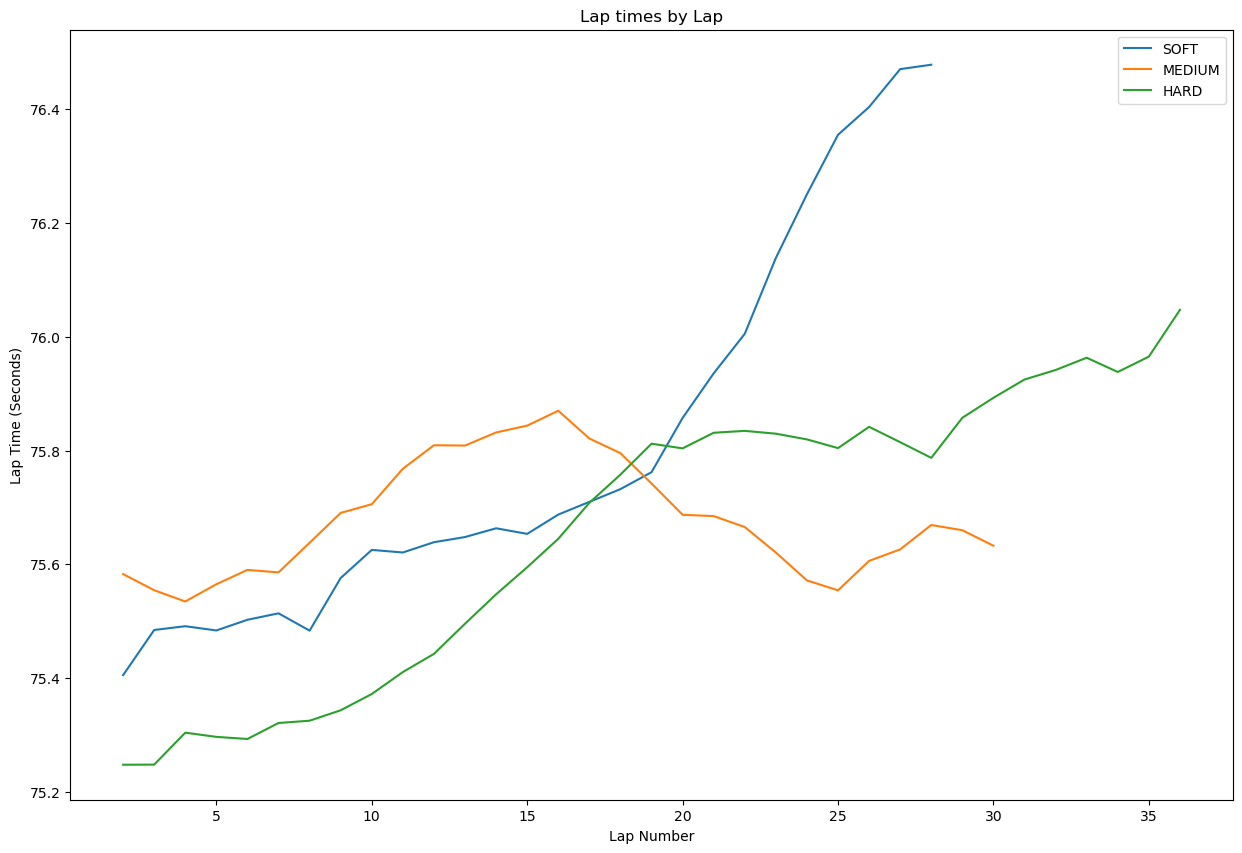

In [20]:
def plot_compound(normal_laps, compound_name):
    laps = normal_laps[normal_laps.Compound == compound_name]
    times = laps.groupby('TyreLife').fuel_corrected_laptime.median()
    smooth = times.rolling(sliding_window, center=True, min_periods=sliding_window//2).mean()
    ax = smooth.plot(label=compound_name, legend=True, figsize=(15,10), title='Lap times by Lap')
    ax.set_xlabel('Lap Number')
    ax.set_ylabel('Lap Time (Seconds)')
    
plot_compound(normal_laps, 'SOFT')
plot_compound(normal_laps, 'MEDIUM')
plot_compound(normal_laps, 'HARD')

# Task 17

What are your observations about the effectiveness of each of these tyre compounds both with respect to speed and longevity?

Include your observations here ...